In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from modules.file import CPandasFile
from modules.kmeans import CKMeans
from modules.drawer import CDrawer

In [3]:
drawer = CDrawer()

1. Đọc dữ liệu `shopping_data.csv`

In [4]:
shopping_raw = CPandasFile().readCsv(r'./data/shopping_data.csv')

shopping_raw

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


1.1. Chỉ cần hai feature là `Annual Income (k$)` và `Spending Score (1-100)`

In [5]:
shopping_raw = shopping_raw.iloc[:, 3:]

shopping_raw

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


1.1.1. Trực quan hóa hai feature `Annual Income (k$)` và `Spending Score (1-100)` lên scatter-plot

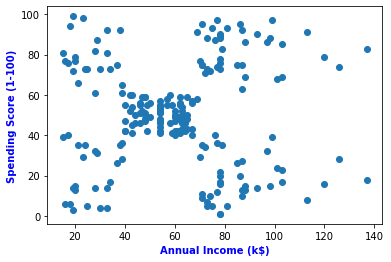

In [6]:
drawer.scatter(shopping_raw.iloc[:, 0], shopping_raw.iloc[:, 1])

> **Nhận xét**:
> * Có khả năng dataset này có thể phân thành 3 hoặc 5 nhóm.

2. Build model

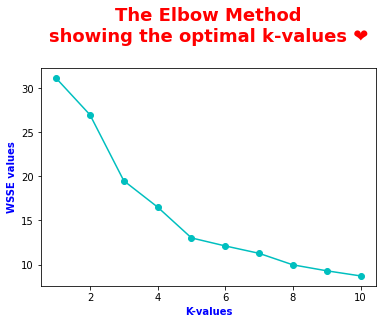

In [7]:
model = CKMeans(shopping_raw)
res = model.recommendKValue(visual=True)

In [8]:
res

,wsse-value
k-value,
1,31.119565
2,26.972839
3,19.498528
4,16.513850
5,13.020126
6,12.110099
7,11.272814
8,9.968000
9,9.292744


> **Nhận xét**
> `K-value` có thể bằng 3 hoặc 5.

3. Chọn thử `k-value` bằng 3 để thử nghiệm model.

3.1. Build model với k = 3

In [9]:
model_k3 = CKMeans(shopping_raw)
model_k3.initModel(3)

3.1.1. Lấy tọa độ của k-cluster

In [10]:
model_k3.showClusterCenter()

array([[44.15447154, 49.82926829],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

3.1.2. Xem label của các sample để biết chúng thuộc cluster nào

In [11]:
model_k3.showSampleLabels()

,Annual Income (k$),Spending Score (1-100),label
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


3.1.3. Trực quan hóa kết quả training

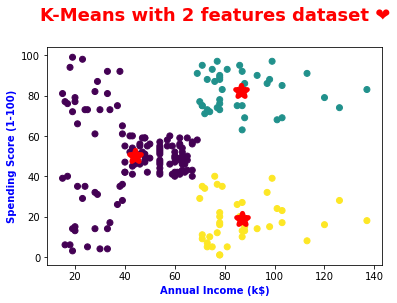

In [12]:
model_k3.visualModelTraining()

3.2. Build model vs k = 5

In [13]:
model_k5 = CKMeans(shopping_raw)
model_k5.initModel(5)

3.2.1. Lấy tọa độ của k-cluster

In [14]:
model_k5.showClusterCenter()

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

3.2.2. Xem label của các sample để biết chúng thuộc cluster nào

In [15]:
model_k5.showSampleLabels()

,Annual Income (k$),Spending Score (1-100),label
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1
...,...,...,...
195,120,79,0
196,126,28,2
197,126,74,0
198,137,18,2


3.2.3. Trực quan hóa kết quả training

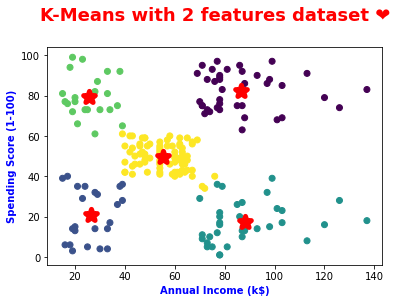

In [16]:
model_k5.visualModelTraining()

> **Nhận xét**
> * Nhóm khách hàng có thu nhập cao dc phân bố thành hai nhóm nhỏ gồm:
>   * Nhóm ít có nhu cầu mua sắm
>   * Nhóm có nhu cầu mua sắm cao
> * Nhóm khách hàng có thu nhập thấp cũng phân bố thành hai nhóm gồm:
>   * Nhóm ít có nhu cầu mua sắm
>   * Nhóm có nhu cầu mua sắm cao
> * Riêng nhóm có thu nhập trung bình thì nhu cầu mua sắm của họ cũng ở mức vừa phải.